In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Clean Text

In [2]:
df=pd.read_csv("relationship_advise_17_comments_EDA_clean.csv",sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61822 entries, 0 to 61821
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   author             61822 non-null  object
 1   author_flair_text  61822 non-null  int64 
 2   body               61822 non-null  object
 3   controversiality   61822 non-null  bool  
 4   created_utc        61822 non-null  object
 5   distinguished      61822 non-null  object
 6   edited             61822 non-null  bool  
 7   gilded             61822 non-null  int64 
 8   id                 61822 non-null  object
 9   link_id            61822 non-null  object
 10  parent_id          61822 non-null  object
 11  score              61822 non-null  int64 
 12  stickied           61822 non-null  bool  
 13  created_hour       61822 non-null  int64 
 14  created_day        61822 non-null  int64 
 15  created_year       61822 non-null  int64 
 16  clean_text         61822 non-null  objec

# Abkürzung Word converting

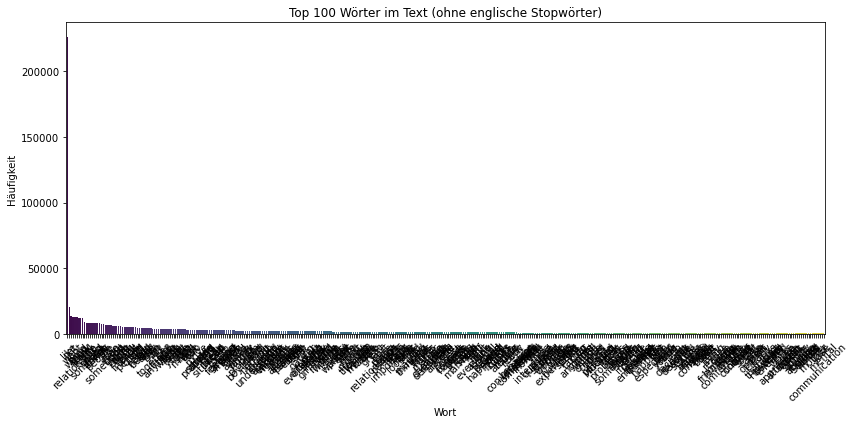

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords  # Importiere die Bibliothek für Stopwörter

# Annahme: Du hast bereits einen DataFrame 'df' mit einer Spalte 'body', die die Textdaten enthält.

# Lade die englischen Stopwörter aus NLTK
stopwords_english = set(stopwords.words('english'))

# Funktion zum Extrahieren und Zählen der Wörter unter Berücksichtigung der Stopwörter
def count_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_english]
    return filtered_words

# Erstelle ein neues DataFrame 'df_filtered_words'
df_filtered_words = df.copy()
df_filtered_words['filtered_words'] = df['clean_text'].apply(count_words)

# Extrahiere die Top 100 häufigsten Wörter
word_counter = Counter(word for words in df_filtered_words['filtered_words'] for word in words)
top_words = word_counter.most_common()[0:400]  # Hier werden die ersten 20 Wörter übersprungen

# Erstelle das Countplot
top_words_df = pd.DataFrame(top_words, columns=['Wort', 'Häufigkeit'])
plt.figure(figsize=(12, 6))
sns.barplot(y='Häufigkeit', x='Wort', data=top_words_df, palette='viridis')
plt.title('Top 100 Wörter im Text (ohne englische Stopwörter)')
plt.ylabel('Häufigkeit')
plt.xlabel('Wort')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
# Initialisieren des Sentiment-Analyzers
analyzer = SentimentIntensityAnalyzer()

# Funktion zur Berechnung des Sentiments und Erstellung der neuen Spalten
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment
df['sentiment_scores'] = df["clean_text"].apply(get_sentiment_scores)

# Extrahieren und speichern Sie die Werte für positive, negative, neutrale Sentiments und den Compound-Wert
df['positive'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['negative'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['neutral'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

In [5]:
df.describe()

,author_flair_text,gilded,score,created_hour,created_day,created_year,comment_len,positive,negative,neutral,compound
count,61822.0,61822.000000,61822.000000,61822.000000,61822.000000,61822.0,61822.000000,61822.000000,61822.000000,61822.000000,61822.000000
mean,0.0,0.000081,4.226683,12.747582,15.653408,2017.0,67.946572,0.134376,0.083464,0.782161,0.202945
std,0.0,0.008993,23.787632,7.279891,8.782465,0.0,79.864196,0.131880,0.098764,0.144018,0.591400
min,0.0,0.000000,-190.000000,0.000000,1.000000,2017.0,1.000000,0.000000,0.000000,0.000000,-0.999200
25%,0.0,0.000000,1.000000,6.000000,8.000000,2017.0,19.000000,0.051000,0.000000,0.721000,-0.261700
50%,0.0,0.000000,1.000000,15.000000,16.000000,2017.0,43.000000,0.113000,0.063000,0.796000,0.296000
75%,0.0,0.000000,3.000000,19.000000,23.000000,2017.0,88.000000,0.180000,0.121000,0.865000,0.750600
max,0.0,1.000000,1878.000000,23.000000,30.000000,2017.0,1672.000000,1.000000,1.000000,1.000000,0.999700


In [6]:
df["compound"].mean()
#0.20287566723819814

0.20294467988741685

In [7]:
import pandas as pd

# Annahme: Du hast bereits einen DataFrame 'df' mit einer Spalte 'compound', die die Compound-Werte enthält.

# Funktion zur Zuordnung des Sentiments basierend auf dem Compound-Wert
def get_sentiment(compound):
    if compound >= 0.05:
        return '1'
    elif compound > -0.05 and compound < 0.05:
        return '0'
    elif compound <= -0.05:
        return '-1'

# Erstelle die neue Spalte 'Sentiment' basierend auf der 'compound'-Spalte
df['Sentiment'] = df['compound'].apply(get_sentiment)

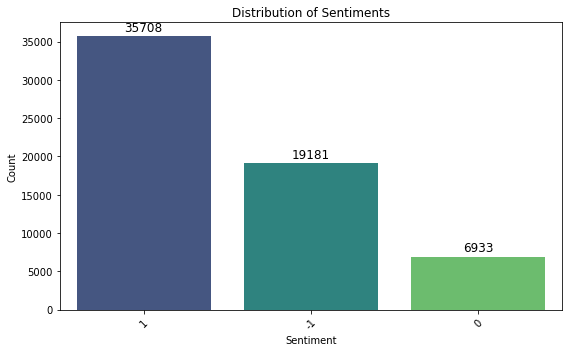

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Create the Countplot for Sentiments
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

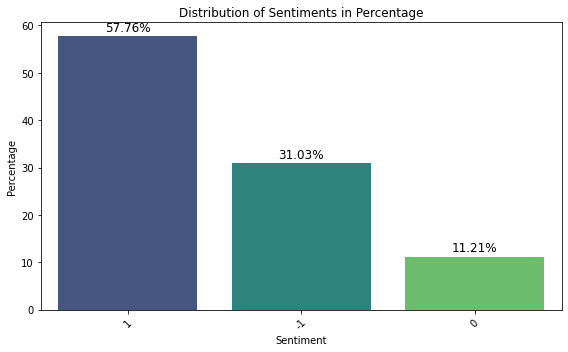

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Calculate the percentage for each sentiment
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100

# Create the bar plot for Sentiments in percentage
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments in Percentage')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add the percentage above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()
#57.75,31.04,11.21

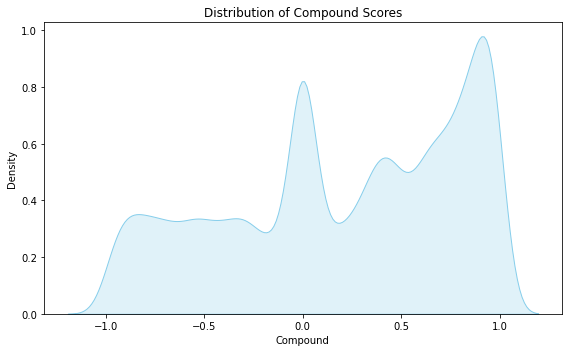

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot for the 'compound' column
plt.figure(figsize=(8, 5))
sns.kdeplot(df['compound'], shade=True, color='skyblue')
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Body

In [51]:
df_body=pd.read_csv("relationship_advise_17_comments_EDA_clean.csv",sep=";")

In [52]:
df_body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61822 entries, 0 to 61821
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   author             61822 non-null  object
 1   author_flair_text  61822 non-null  int64 
 2   body               61822 non-null  object
 3   controversiality   61822 non-null  bool  
 4   created_utc        61822 non-null  object
 5   distinguished      61822 non-null  object
 6   edited             61822 non-null  bool  
 7   gilded             61822 non-null  int64 
 8   id                 61822 non-null  object
 9   link_id            61822 non-null  object
 10  parent_id          61822 non-null  object
 11  score              61822 non-null  int64 
 12  stickied           61822 non-null  bool  
 13  created_hour       61822 non-null  int64 
 14  created_day        61822 non-null  int64 
 15  created_year       61822 non-null  int64 
 16  clean_text         61822 non-null  objec

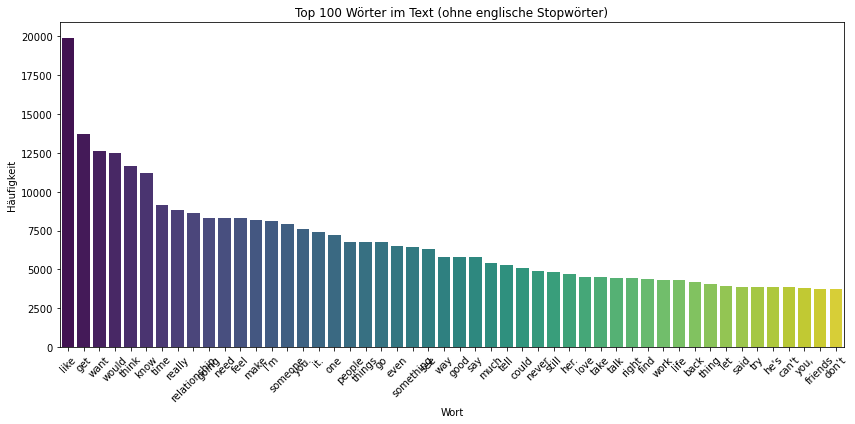

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords  # Importiere die Bibliothek für Stopwörter

# Annahme: Du hast bereits einen DataFrame 'df' mit einer Spalte 'body', die die Textdaten enthält.

# Lade die englischen Stopwörter aus NLTK
stopwords_english = set(stopwords.words('english'))

# Funktion zum Extrahieren und Zählen der Wörter unter Berücksichtigung der Stopwörter
def count_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_english]
    return filtered_words

# Erstelle ein neues DataFrame 'df_filtered_words'
df_filtered_words = df_body.copy()
df_filtered_words['filtered_words'] = df_body['body'].apply(count_words)

# Extrahiere die Top 100 häufigsten Wörter
word_counter = Counter(word for words in df_filtered_words['filtered_words'] for word in words)
top_words = word_counter.most_common()[0:50]  # Hier werden die ersten 20 Wörter übersprungen

# Erstelle das Countplot
top_words_df = pd.DataFrame(top_words, columns=['Wort', 'Häufigkeit'])
plt.figure(figsize=(12, 6))
sns.barplot(y='Häufigkeit', x='Wort', data=top_words_df, palette='viridis')
plt.title('Top 100 Wörter im Text (ohne englische Stopwörter)')
plt.ylabel('Häufigkeit')
plt.xlabel('Wort')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
df_body['body'] = df_body['body'].str.replace('OP', 'Originalposter')
df_body['body'] = df_body['body'].str.replace('bf', 'boyfriend')
df_body['body'] = df_body['body'].str.replace('gf', 'girlfriend')

In [56]:
# Initialisieren des Sentiment-Analyzers
analyzer = SentimentIntensityAnalyzer()

# Funktion zur Berechnung des Sentiments und Erstellung der neuen Spalten
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment
df_body['sentiment_scores'] = df_body["body"].apply(get_sentiment_scores)

# Extrahieren und speichern Sie die Werte für positive, negative, neutrale Sentiments und den Compound-Wert
df_body['positive'] = df_body['sentiment_scores'].apply(lambda x: x['pos'])
df_body['negative'] = df_body['sentiment_scores'].apply(lambda x: x['neg'])
df_body['neutral'] = df_body['sentiment_scores'].apply(lambda x: x['neu'])
df_body['compound'] = df_body['sentiment_scores'].apply(lambda x: x['compound'])

In [57]:
df_body.describe()

,author_flair_text,gilded,score,created_hour,created_day,created_year,comment_len,positive,negative,neutral,compound
count,61822.0,61822.000000,61822.000000,61822.000000,61822.000000,61822.0,61822.000000,61822.000000,61822.000000,61822.000000,61822.000000
mean,0.0,0.000081,4.226683,12.747582,15.653408,2017.0,67.946572,0.141673,0.091379,0.766948,0.180873
std,0.0,0.008993,23.787632,7.279891,8.782465,0.0,79.864196,0.142493,0.106624,0.155304,0.594431
min,0.0,0.000000,-190.000000,0.000000,1.000000,2017.0,1.000000,0.000000,0.000000,0.000000,-0.999100
25%,0.0,0.000000,1.000000,6.000000,8.000000,2017.0,19.000000,0.050000,0.000000,0.701000,-0.296000
50%,0.0,0.000000,1.000000,15.000000,16.000000,2017.0,43.000000,0.117000,0.070000,0.783000,0.254000
75%,0.0,0.000000,3.000000,19.000000,23.000000,2017.0,88.000000,0.189000,0.133000,0.857000,0.726900
max,0.0,1.000000,1878.000000,23.000000,30.000000,2017.0,1672.000000,1.000000,1.000000,1.000000,0.999700


In [58]:
df_body["compound"].mean()

0.1808733541457735

In [59]:
import pandas as pd

# Annahme: Du hast bereits einen DataFrame 'df' mit einer Spalte 'compound', die die Compound-Werte enthält.

# Funktion zur Zuordnung des Sentiments basierend auf dem Compound-Wert
def get_sentiment(compound):
    if compound >= 0.05:
        return '1'
    elif compound > -0.05 and compound < 0.05:
        return '0'
    elif compound <= -0.05:
        return '-1'

# Erstelle die neue Spalte 'Sentiment' basierend auf der 'compound'-Spalte
df_body['Sentiment'] = df_body['compound'].apply(get_sentiment)

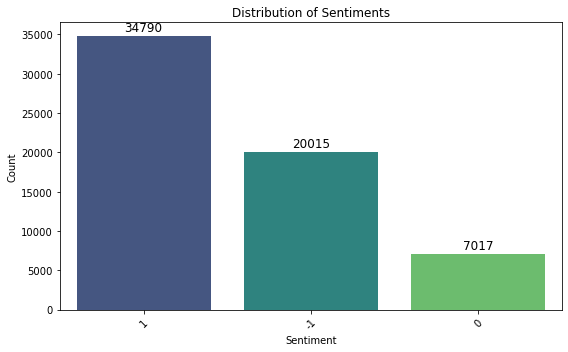

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Create the Countplot for Sentiments
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Sentiment', data=df_body, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

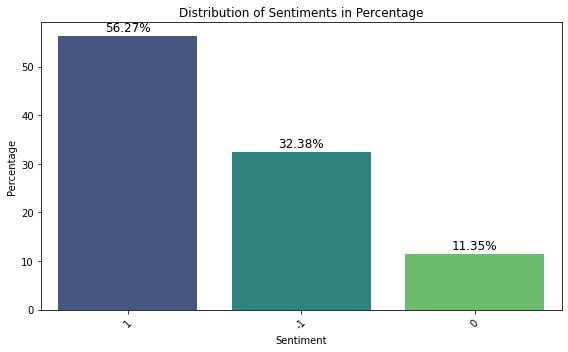

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Calculate the percentage for each sentiment
sentiment_counts = df_body['Sentiment'].value_counts(normalize=True) * 100

# Create the bar plot for Sentiments in percentage
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments in Percentage')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add the percentage above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

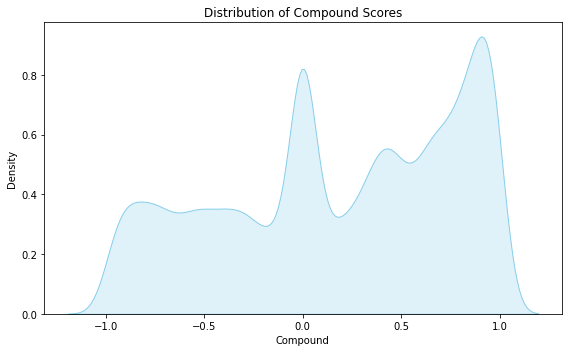

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot for the 'compound' column
plt.figure(figsize=(8, 5))
sns.kdeplot(df_body['compound'], shade=True, color='skyblue')
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound')
plt.ylabel('Density')
plt.tight_layout()
plt.show()